In [ ]:
#importing modules
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

##Data Visualization

In [ ]:
#loading training dataset
url = 'https://raw.githubusercontent.com/AnuragPhukan/Breast_Cancer_Detection/main/TrainDataset2023.csv'
train_df = pd.read_csv(url)
train_df

ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0    TRG002174              1                     144.000000  41.0   0    0   
1    TRG002178              0                     142.000000  39.0   1    1   
2    TRG002204              1                     135.000000  31.0   0    0   
3    TRG002206              0                      12.000000  35.0   0    0   
4    TRG002210              0                     109.000000  61.0   1    0   
..         ...            ...                            ...   ...  ..  ...   
395  TRG002948              0                      54.500000  58.5   1    0   
396  TRG002954              0                      49.250000  34.3   0    0   
397  TRG002958              0                      48.500000  53.3   0    0   
398  TRG002961              0                      47.500000  68.8   1    0   
399  TRG002962              0                      46.916667  46.0   1    0   

     HER2  TrippleNegative  ChemoGrade  Proliferation  ...  \
0       0                1           3              3  ...   
1       0                0           3              3  ...   
2       0                1           2              1  ...   
3       0                1           3              3  ...   
4       0                0           2              1  ...   
..    ...              ...         ...            ...  ...   
395     1                0           3              2  ...   
396     0                1           3              3  ...   
397     0                1           2              1  ...   
398     0                0           3              3  ...   
399     0                0           2              1  ...   

     original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                         0.517172   
1                                         0.444391   
2                                         0.534549   
3                                         0.506185   
4                                         0.462282   
..                                             ...   
395                                       0.476493   
396                                       0.418382   
397                                       0.527779   
398                                       0.313693   
399                                       0.670229   

     original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                        0.375126                    3.325332   
1                                        0.444391                    3.032144   
2                                        0.534549                    2.485848   
3                                        0.506185                    2.606255   
4                                        0.462282                    2.809279   
..                                            ...                         ...   
395                                      0.476493                    2.453583   
396                                      0.418382                    2.995603   
397                                      0.527778                    1.500000   
398                                      0.313693                    3.573557   
399                                      0.670229                    1.857045   

     original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                         0.002314                 3.880772e+06   
1                         0.005612                 2.372010e+06   
2                         0.006752                 1.540027e+06   
3                         0.003755                 6.936741e+06   
4                         0.006521                 1.265399e+06   
..                             ...                          ...   
395                       0.003229                 2.327038e+06   
396                       0.004243                 1.005061e+06   
397                       0.003728                 2.132007e+05   
398                       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


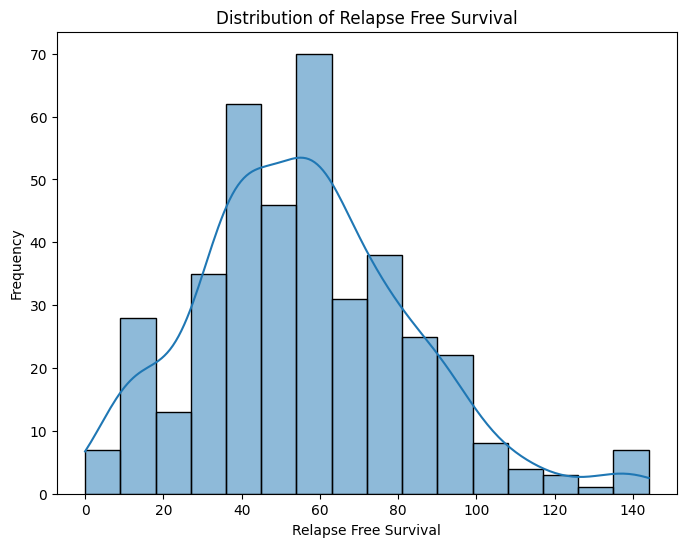

In [ ]:
# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_df['RelapseFreeSurvival (outcome)'], kde=True)
plt.title('Distribution of Relapse Free Survival')
plt.xlabel('Relapse Free Survival')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#loading the dataset
url = 'https://raw.githubusercontent.com/AnuragPhukan/Breast_Cancer_Detection/main/TrainDataset2023.csv'
train_df = pd.read_csv(url)
train_df = train_df.drop(columns=['ID'])
train_df = train_df.drop(columns=['pCR (outcome)'])
train_df

train_df = train_df[train_df['RelapseFreeSurvival (outcome)'] != 999]
train_df = train_df.replace(999, np.nan)

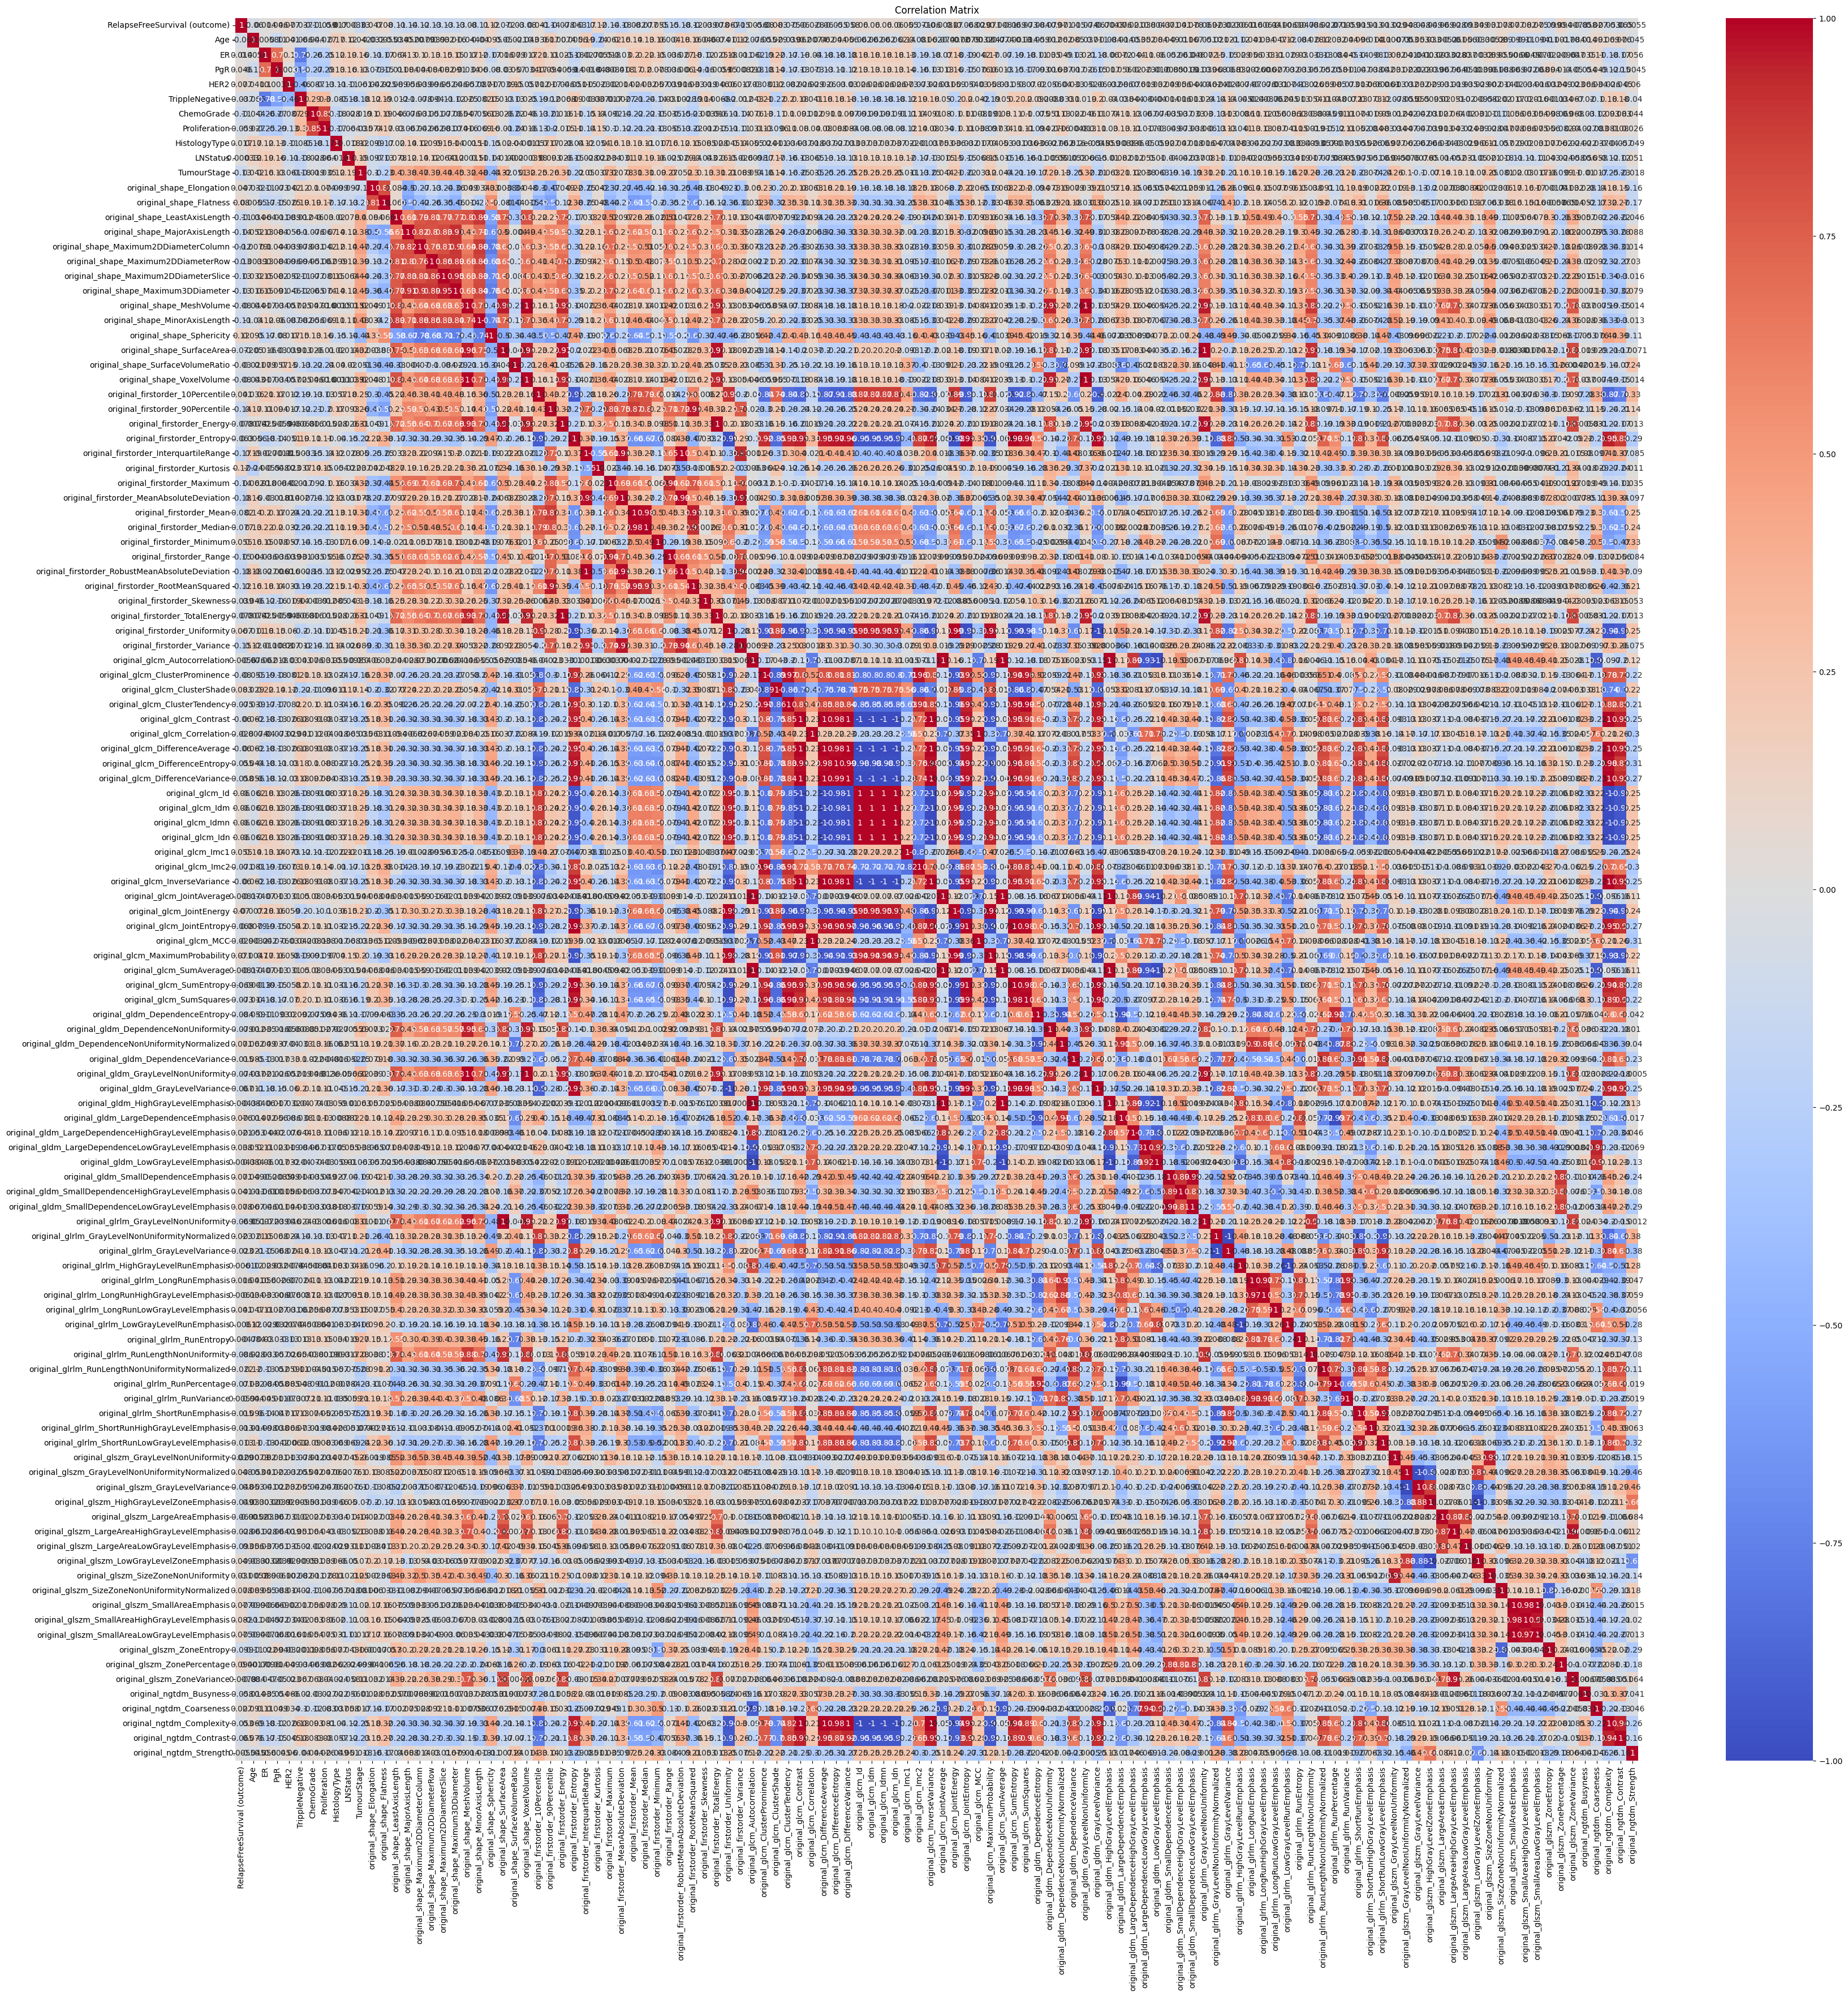

In [ ]:
#Plotting Heatmap for correlation
plt.figure(figsize=(40, 40))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Replace 999 with NaN
train_df = train_df.replace(999, np.nan)

# Dropping rows with missing target variable
train_df = train_df.dropna(subset=['RelapseFreeSurvival (outcome)'])

# Splitting dataset into features and target variable
X = train_df.drop(columns=['RelapseFreeSurvival (outcome)'])
y = train_df['RelapseFreeSurvival (outcome)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation and Scaling
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)



In [ ]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()
corr_matrix

RelapseFreeSurvival (outcome)       Age  \
RelapseFreeSurvival (outcome)                       1.000000 -0.059959   
Age                                                -0.059959  1.000000   
ER                                                  0.014400  0.005765   
PgR                                                 0.046349 -0.114939   
HER2                                                0.076700  0.040706   
...                                                      ...       ...   
original_ngtdm_Busyness                            -0.058083 -0.014305   
original_ngtdm_Coarseness                           0.027091  0.090661   
original_ngtdm_Complexity                          -0.052788  0.068994   
original_ngtdm_Contrast                            -0.064615  0.076291   
original_ngtdm_Strength                             0.005459 -0.044645   

                                     ER       PgR      HER2  TrippleNegative  \
RelapseFreeSurvival (outcome)  0.014400  0.046349  0.076700        -0.036531   
Age                            0.005765 -0.114939  0.040706        -0.065935   
ER                             1.000000  0.702090  0.103587        -0.776022   
PgR                            0.702090  1.000000  0.003096        -0.584613   
HER2                           0.103587  0.003096  1.000000        -0.463739   
...                                 ...       ...       ...              ...   
original_ngtdm_Busyness        0.034885 -0.053709  0.066348        -0.019702   
original_ngtdm_Coarseness      0.109972  0.049495  0.033561        -0.099821   
original_ngtdm_Complexity     -0.176694 -0.119784 -0.025752         0.178161   
original_ngtdm_Contrast       -0.166302 -0.147814 -0.044651         0.184193   
original_ngtdm_Strength        0.055846  0.004476  0.060362        -0.040046   

                               ChemoGrade  Proliferation  HistologyType  \
RelapseFreeSurvival (outcome)   -0.109455      -0.058821       0.016572   
Age                             -0.044197      -0.026902       0.170358   
ER                              -0.262100      -0.249526       0.124474   
PgR                             -0.265992      -0.285898       0.132407   
HER2                            -0.086603      -0.126602      -0.106150   
...                                   ...            ...            ...   
original_ngtdm_Busyness         -0.029844      -0.026996      -0.021809   
original_ngtdm_Coarseness       -0.119033      -0.082719      -0.037083   
original_ngtdm_Complexity        0.092535       0.080725      -0.039893   
original_ngtdm_Contrast          0.083356       0.080072      -0.056933   
original_ngtdm_Strength          0.044052       0.025540      -0.049097   

                               LNStatus  ...  \
RelapseFreeSurvival (outcome) -0.000330  ...   
Age                            0.124004  ...   
ER                             0.192743  ...   
PgR                            0.156902  ...   
HER2                          -0.112200  ...   
...                                 ...  ...   
original_ngtdm_Busyness       -0.055917  ...   
original_ngtdm_Coarseness      0.058299  ...   
original_ngtdm_Complexity     -0.123687  ...   
original_ngtdm_Contrast       -0.115391  ...   
original_ngtdm_Strength        0.050630  ...   

                               original_glszm_SmallAreaHighGrayLevelEmphasis  \
RelapseFreeSurvival (outcome)                                       0.082442   
Age                                                                -0.113668   
ER                                                                 -0.004504   
PgR                                                                -0.071640   
HER2                                                               -0.033698   
...                                                                      ...   
original_ngtdm_Busyness                                            -0.110788   
original_ngtdm_Coarseness                                      

In [ ]:
# Total features before removal
total_features_before = X_train.shape[1]
print(f"Total features before removal: {total_features_before}")

Total features before removal: 117


In [ ]:
#Set the correlation threshold (e.g., 0.9)
threshold = 0.9
# Identify pairs of highly correlated features
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_pairs.add(colname)

print("Highly correlated features to be removed:", high_corr_pairs)

# Number of features to be removed
num_features_removed = len(high_corr_pairs)
print(f"Number of features to be removed: {num_features_removed}")


Highly correlated features to be removed: {'original_firstorder_RootMeanSquared', 'original_glrlm_GrayLevelNonUniformity', 'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glcm_JointAverage', 'original_glszm_LowGrayLevelZoneEmphasis', 'original_glcm_Id', 'original_glcm_Imc2', 'original_gldm_LargeDependenceLowGrayLevelEmphasis', 'original_glcm_SumAverage', 'original_gldm_GrayLevelNonUniformity', 'original_glcm_JointEnergy', 'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_HighGrayLevelEmphasis', 'original_ngtdm_Contrast', 'original_shape_SurfaceArea', 'original_glszm_ZoneVariance', 'original_glcm_DifferenceEntropy', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_MeanAbsoluteDeviation', 'original_gldm_LargeDependenceEmphasis', 'original_firstorder_Median', 'original_firstorder_TotalEnergy', 'original_glcm_SumSquares', 'original_gldm_LowGrayLevelEmphasis', 'original_firstorder_Entropy', 'origi

In [ ]:
# Drop highly correlated features from X_train and X_test
X_train = X_train.drop(columns=high_corr_pairs)
X_test = X_test.drop(columns=high_corr_pairs)


In [ ]:
# Imputation
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scaling
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#Model Training without Hyperparameter Tuning

In [ ]:
# Model Training
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Linear Regression": LinearRegression(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} MAE: {mae:.4f}")


Random Forest MAE: 22.7225
Decision Tree MAE: 33.4865
Gradient Boosting MAE: 22.4961
SVR MAE: 21.6881
KNN MAE: 25.0387
Linear Regression MAE: 24.8757
AdaBoost MAE: 24.1152
Bagging MAE: 23.7097


In [ ]:
#Artificial Nueral Network Models
ann_model = Sequential([
    Dense(117, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_absolute_error')
ann_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)

y_pred_ann = ann_model.predict(X_test_scaled)
ann_mae = mean_absolute_error(y_test, y_pred_ann)
print(f"ANN MAE: {ann_mae:.4f}")


3/3 [==============================] - 0s 5ms/step
ANN MAE: 24.2155


##Hyperparameter Optimization

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Hyperparameter Tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search_rf.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

# Using the best estimator to make predictions
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculating MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE after tuning: {mae_rf:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# #Hyperparameter Tuning for Gradient Boosting

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=param_grid_gb,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2
)
grid_search_gb.fit(X_train_scaled, y_train)

# Retrieving the best parameters
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

# Calculating MAE
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Gradient Boosting MAE after tuning: {mae_gb:.4f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


#Hyperparameter Tuning for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'epsilon': [0.01, 0.1, 0.5, 1, 2]
}

grid_search_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_svr,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2
)
grid_search_svr.fit(X_train_scaled, y_train)

# Retrieving the best parameters
best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test_scaled)

# Calculating MAE
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"SVR MAE after tuning: {mae_svr:.4f}")



Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...C=0.1, epsilon=0.01, gamma=scale, 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Hyperparameter Tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 70, 90],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid_knn,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2
)
grid_search_knn.fit(X_train_scaled, y_train)

# Retrieving the best parameters
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Calculating MAE
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"KNN MAE after tuning: {mae_knn:.4f}")


Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Hyperparameter Tuning for AdaBoost

param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator': [DecisionTreeRegressor(max_depth=d) for d in [1, 3, 5, 10, None]]
}


grid_search_adaboost = GridSearchCV(
    estimator=AdaBoostRegressor(),
    param_grid=param_grid_adaboost,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2
)
grid_search_adaboost.fit(X_train_scaled, y_train)

# Retrieving the best parameters
best_adaboost = grid_search_adaboost.best_estimator_
y_pred_adaboost = best_adaboost.predict(X_test_scaled)

# Calculating MAE
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
print(f"AdaBoost MAE after tuning: {mae_adaboost:.4f}")


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.3s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=200; total time=   0.5s
[CV] END estimator=DecisionTreeRegressor(max_depth=1), learning_rate=0.01, n_estimators=200; total time=   0.5s
[CV] END estimator=DecisionTreeRegressor(max_

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

#Hyperparameter Tuning for Bagging
param_grid_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

grid_search_bagging = GridSearchCV(
    estimator=BaggingRegressor(),
    param_grid=param_grid_bagging,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2
)
grid_search_bagging.fit(X_train_scaled, y_train)

# Retrieving the best parameters
best_bagging = grid_search_bagging.best_estimator_
y_pred_bagging = best_bagging.predict(X_test_scaled)

# Calculating MAE
mae_bagging = mean_absolute_error(y_test, y_pred_bagging)
print(f"Bagging MAE after tuning: {mae_bagging:.4f}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, bootstrap_features=True, max_features=0.5, max_samples=0.5, n_es

In [ ]:
#Print Hyperparameter Tested Models MAE Value on Testing Set
print(f"Random Forest MAE after tuning: {mae_rf:.4f}")
print(f"Gradient Boosting MAE after tuning: {mae_gb:.4f}")
print(f"SVR MAE after tuning: {mae_svr:.4f}")
print(f"KNN MAE after tuning: {mae_knn:.4f}")
print(f"AdaBoost MAE after tuning: {mae_adaboost:.4f}")
print(f"Bagging MAE after tuning: {mae_bagging:.4f}")

Random Forest MAE after tuning: 22.1687
Gradient Boosting MAE after tuning: 21.4468
SVR MAE after tuning: 22.6959
KNN MAE after tuning: 24.0790
AdaBoost MAE after tuning: 23.3509
Bagging MAE after tuning: 22.3483


##K-Fold After Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# best hyperparameters for each model
best_params_rf = grid_search_rf.best_params_  # best parameters for Random Forest
best_params_gb = grid_search_gb.best_params_  # best parameters for Gradient Boosting
best_params_svr = grid_search_svr.best_params_ # best parameters for SVR
best_params_knn = grid_search_knn.best_params_ # best parameters for KNN
best_params_adaboost = grid_search_adaboost.best_params_ # best parameters for AdaBoost
best_params_bagging = grid_search_bagging.best_params_ # best parameters for Bagging


models = {
    "Random Forest": RandomForestRegressor(**best_params_rf),
    "Gradient Boosting": GradientBoostingRegressor(**best_params_gb),
    "SVR": SVR(**best_params_svr),
    "KNN": KNeighborsRegressor(**best_params_knn),
    "AdaBoost": AdaBoostRegressor(**best_params_adaboost),
    "Bagging": BaggingRegressor(**best_params_bagging)
}

# Perform 5-fold cross-validation and compute MAE
mae_scores = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores[name] = -np.mean(cv_scores)
names = []
# Print MAE scores for each model
for name, mae in mae_scores.items():
    names.append(name)
    print(f"{name} MAE after tuning: {mae:.4f}")



Random Forest MAE after tuning: 20.8973
Gradient Boosting MAE after tuning: 20.7539
SVR MAE after tuning: 20.6764
KNN MAE after tuning: 20.1939
AdaBoost MAE after tuning: 21.0534
Bagging MAE after tuning: 20.6802


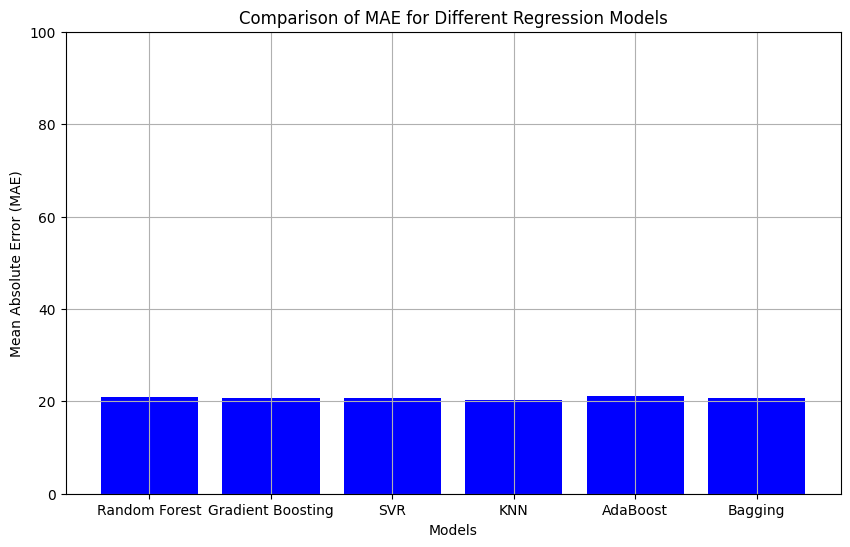

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and corresponding MAE scores
models = names
mae_values = list(mae_scores.values())

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='blue')
plt.ylim(top = 100)
plt.grid()

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE for Different Regression Models')

# Show the graph
plt.show()
